In [2]:
from datetime import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from clouddrift import adapters, ragged

Cannot determine the file has been updated on the remote source.                               'Last-Modified' header not present.
https://www.aoml.noaa.gov/hrd/hurdat/hurdat2.html: 6.61MB [00:01, 6.51MB/s]
Retrieving the number of obs: 100%|████| 1951/1951 [00:00<00:00, 1006282.23it/s]
/home/ksantana/sources/CloudDrift/clouddrift/clouddrift/raggedarray.py:385: UserWarning: Variable cyclone_number requested but not found; skipping.
  warnings.warn(f"Variable {var} requested but not found; skipping.")
/home/ksantana/sources/CloudDrift/clouddrift/clouddrift/raggedarray.py:392: UserWarning: Variable max_sustained_radii requested but not found; skipping.
  warnings.warn(f"Variable {var} requested but not found; skipping.")
Filling the Ragged Array:   0%|                        | 0/1951 [00:00<?, ?it/s]/home/ksantana/sources/CloudDrift/clouddrift/clouddrift/raggedarray.py:416: UserWarning: Variable cyclone_number requested but not found; skipping.
  warnings.warn(
/home/ksantana/sources/Clo

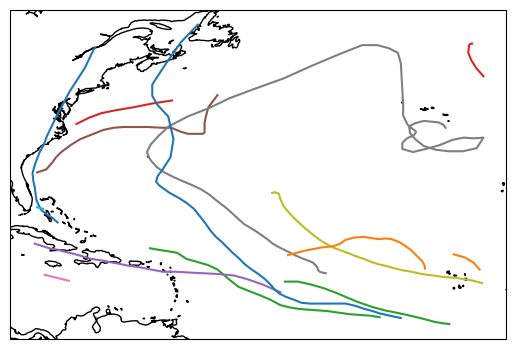

In [3]:

def plot_trajectories(d, linestyle):
    obs_ranges = np.cumsum(np.array([0, *ds["rowsize"]]))
    traj_ids = ds["id"].to_numpy().tolist()
    for traj_id in traj_ids:
        index = traj_ids.index(traj_id)
        start, end = obs_ranges[index], obs_ranges[index+1]
        selected = slice(start, end)
        
        plt.plot(
            ds["lon"].isel(obs=selected), ds["lat"].isel(obs=selected),
            linestyle=linestyle, ms=0.1,
            transform=ccrs.Geodetic(),
        )

# Plot the storms on the projection after applying the geodetic transformation
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

hurdat_ds = adapters.hurdat2.to_raggedarray().to_xarray()
# gdp1h_ds = adapters.gdp1h.to_raggedarray(n_random_id=100).to_xarray()
criteria = dict(
    lat=(10, 50), 
    lon=(-80, -20), 
    time=(
        np.float64(datetime(2020, 8, 1).timestamp()), 
        np.float64(datetime(2020, 10, 1).timestamp())
    )
)

# gdp1h_ds = ragged.subset(gdp1h_ds, criteria)
hurdat_ds = ragged.subset(hurdat_ds, criteria)

for ds, ls in [(hurdat_ds, "-")]:
    plot_trajectories(ds, ls)